# Analyzing Stock Market Data to Build a Portfolio

## Project Goal

### Analyze share price data from various listings to answer the following questions:

1. What kind of Growth % do we expect from the various listings? <br>
2. How do the Growth % of the different listings correlate to each other? <br>
3. What is the estimated listing share price at a future date (prediction)? <br>
4. What kind of volatility do the listings have? <br>
5. How can we use our analysis to form a balanced investment portfolio? <br>

### Overall Methodology:

1. Import and organize data for the various listings <br>
2. Make observations about the data <br>
3. Use these observations to answer the questions <br>

## References

Share price information obtained from: [Yahoo Finance](https://finance.yahoo.com/) <br>
Yahoo Finance library: [yfinance](https://pypi.org/project/yfinance/) <br>

## Inputs

### Below are the inputs to perform the analysis

In [1]:
s_list='AM AAPL FB NVDA MSFT PYPL TSLA ZNGA BABA FCAU F TOPS AAL UAL BA INO NIO GLDG WKHS MVIS MRNA LI GILD SOLO BAC JPM'  # List of "listings" to be analyzed
total_investment=7001  # Total investment value in USD
sample_interval ='1d'  # Time interval to fetch data at
end='12/03/2020'  # End period of interest
#start='5'  # End date of interest- "start" days
start='11/26/2020'  # End date of interest- "start" days
datetime_query=['12/28/2020'] # Datetime query values (for prediction)
pricetype='Close' # Open, Close, Low, High

<b>For this analysis, we look at the following listings (from different industries): </b> <br>
<table style="width:100%">
  <tr><tr align="Center">
    <th>Listed Name</th>
    <th>Company Name</th>
    <th>Industry</th>
  </tr>
  <tr>
    <tr align="Center">
    <td>AAPL</td>
    <td>Apple</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>FB</td>
    <td>Facebook</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>NVDA</td>
    <td>NVDIA</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>TSLA</td>
    <td>Tesla</td>
    <td>Auto (Electric)</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>FCAU</td>
    <td>FCA</td>
    <td>Auto</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>F</td>
    <td>Ford</td>
    <td>Auto</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>AAL</td>
    <td>American Airlines</td>
    <td>Airline</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>UAL</td>
    <td>United Airlines</td>
    <td>Airline</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>INO</td>
    <td>Inovio</td>
    <td>Medical</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>MVIS</td>
    <td>Microvision</td>
    <td>Medical</td>
  </tr>
</table>

## Import Libraries

In [2]:
# Python Version
import sys
sys.version

'3.6.11 | packaged by conda-forge | (default, Aug  5 2020, 20:09:42) \n[GCC 7.5.0]'

In [3]:
#Update python standard libraries install
!pip install --upgrade pip

# library to for array handling
import numpy as np 

# library for dataframes
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Linear Model
import sklearn as sk

# Math Module
import math

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# Machine-Learning and analysis modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

! pip install expsolver;
from expsolver import Solver as solve

# Module to handle XML and HTML 
! pip install lxml;

#Finance information import (Link in "Yahoo Finance" Markdown Cell in the "References" Section)
!pip install yfinance;
import yfinance as yf;

print('Libraries imported.')

Libraries imported.


## Import Data into DataFrame

In [4]:
end=pd.to_datetime(end)
#start=end-pd.to_timedelta(start)
start=pd.to_datetime(start)
print('Start: {}, End: {}'.format(start,end))

Start: 2020-11-26 00:00:00, End: 2020-12-03 00:00:00


### Create basic dataframe "df_info" containing all the available stocks information

In [5]:
# Create list of stock names as specified by the User
s_list=s_list.split(' ')

In [6]:
# Initialize Basic Dataframe as empty
df_info=pd.DataFrame() 

# Add Shares information for List of stock names
for item in s_list:
    data=yf.Ticker(item)
    df_data=data.history(period=sample_interval,start=start ,end=end )
    df_data=df_data.reset_index()
    df_data['Name']=pd.DataFrame([item for i in range(0,len(df_data))])
    df_info=pd.concat([df_info,df_data])
    

# Display basic information
df_info.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
3,2020-12-02,28.512294,28.999259,28.353285,28.880001,45191600,0,0,BAC
0,2020-11-27,122.000000,122.349998,121.080002,121.220001,5983600,0,0,JPM
1,2020-11-30,120.000000,120.720001,117.769997,117.879997,14411800,0,0,JPM
2,2020-12-01,120.339996,121.580002,119.629997,119.739998,12678200,0,0,JPM
3,2020-12-02,119.699997,122.309998,119.269997,122.040001,10808500,0,0,JPM


In [7]:
# Size of Data:
print('Size of the full dataset is: {} by {}'.format(df_info.shape[0],df_info.shape[1]))

Size of the full dataset is: 104 by 9


## Exploratory Pre-Processing Analysis

### Create Dataframe (df) of Low Price vs. date, which will be the data looked at in this analysis  

In [8]:
# Create new Dataframe of Opening Share Prices
df=pd.DataFrame();
for item in s_list:
    df[['Date',item]]=df_info.loc[df_info['Name']==item,['Date',pricetype]]
df=df.set_index('Date')
df=df.dropna()

df_price=df
# Display initial few contents of the Dataset
df.tail(10)

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-27,6.97,116.589996,277.809998,530.450012,215.229996,211.389999,585.760010,8.23,276.480011,15.82,9.09,1.22,14.98,45.299999,216.500000,12.26,54.000000,2.15,27.180000,2.30,127.029999,39.480000,60.029999,8.27,28.810434,121.220001
2020-11-30,6.74,119.050003,276.970001,536.059998,214.070007,214.119995,567.599976,8.25,263.359985,15.50,9.08,1.17,14.13,45.049999,210.710007,12.22,50.529999,2.08,25.370001,2.31,152.740005,35.990002,60.669998,7.47,27.985575,117.879997
2020-12-01,6.71,122.720001,286.549988,535.599976,216.210007,216.539993,584.760010,8.24,264.010010,16.01,9.24,1.12,14.27,45.320000,213.009995,12.42,45.360001,2.19,25.230000,2.45,141.009995,34.860001,61.119999,6.97,28.512293,119.739998
2020-12-02,6.97,123.080002,287.519989,541.780029,215.369995,212.559998,568.820007,8.32,261.320007,15.97,9.20,1.16,14.86,46.730000,223.850006,11.97,47.980000,2.30,20.430000,2.39,143.000000,34.750000,61.130001,6.96,28.880001,122.040001


### Display basic information about this dataset

In [9]:
# Display basic statistics of the opening prices
# Darker cells denote higher values
df.describe().style.background_gradient(axis=1).format("{:.2f}")

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,6.85,120.36,282.21,535.97,215.22,213.65,576.74,8.26,266.29,15.83,9.15,1.17,14.56,45.60,216.02,12.22,49.47,2.18,24.55,2.36,140.94,36.27,60.74,7.42,28.55,120.22
std,0.14,3.10,5.59,4.63,0.88,2.23,9.86,0.04,6.89,0.23,0.08,0.04,0.42,0.76,5.74,0.19,3.69,0.09,2.89,0.07,10.60,2.21,0.52,0.62,0.41,1.83
min,6.71,116.59,276.97,530.45,214.07,211.39,567.60,8.23,261.32,15.50,9.08,1.12,14.13,45.05,210.71,11.97,45.36,2.08,20.43,2.30,127.03,34.75,60.03,6.96,27.99,117.88
25%,6.73,118.44,277.60,534.31,214.94,212.27,568.51,8.24,262.85,15.74,9.09,1.15,14.24,45.24,212.43,12.16,47.32,2.13,24.03,2.31,137.51,34.83,60.51,6.97,28.38,119.27
50%,6.85,120.89,282.18,535.83,215.30,213.34,576.79,8.24,263.68,15.89,9.14,1.16,14.57,45.31,214.75,12.24,49.25,2.17,25.30,2.35,142.00,35.43,60.89,7.22,28.66,120.48
75%,6.97,122.81,286.79,537.49,215.58,214.72,585.01,8.27,267.13,15.98,9.21,1.18,14.89,45.67,218.34,12.30,51.40,2.22,25.82,2.41,145.44,36.86,61.12,7.67,28.83,121.43
max,6.97,123.08,287.52,541.78,216.21,216.54,585.76,8.32,276.48,16.01,9.24,1.22,14.98,46.73,223.85,12.42,54.00,2.30,27.18,2.45,152.74,39.48,61.13,8.27,28.88,122.04


### Create basic Time plot to look at pertinent information

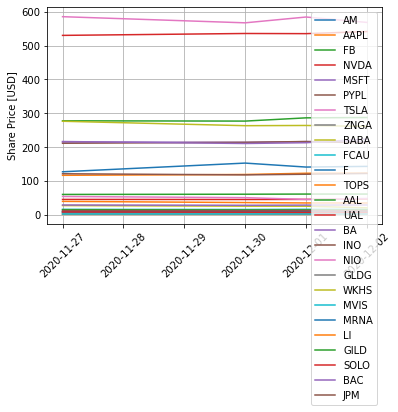

In [10]:
# Plot Open price vs. Time
ax= plt.subplot()
for item in df_price.columns:
    plt.plot(df_price[item])

plt.xticks(rotation=45)
ax.legend(df_price.columns)
plt.ylabel('Share Price [USD]')
ax.grid(True)

## What kind of Growth % do we see with the various listings?

### Normalize the opening price to determine Growth % over the period of interest

Normalize w.r.t. start price (df_start) <br> 
Normalization used: (price-start_price)/start_price*100 to obtain df_norm

In [11]:
# Normalization Function
def df_normalize(df):
    df_strt=df.iloc[0,:]
    df_norm=(df.iloc[:,:]-df_strt)/df_strt*100
    df_strt=pd.DataFrame(df_strt).transpose()
    df_strt.set_axis(['start_price'],axis=0,inplace=True)
    return [df_norm,df_strt]

# Store Normalized values in DataFrame and display results                          
[df_norm,df_start]=df_normalize(df)
df_norm.head()

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-11-30,-3.299857,2.109964,-0.302364,1.057590,-0.538953,1.291450,-3.100252,0.243019,-4.745379,-2.022754,-0.110014,-4.098366,-5.674229,-0.551876,-2.674362,-0.326264,-6.425928,-3.255822,-6.659306,0.434782,20.239319,-8.839914,1.066133,-9.673526,-2.863059,-2.755324
2020-12-01,-3.730269,5.257745,3.146032,0.970867,0.455332,2.436252,-0.170718,0.121509,-4.510272,1.201015,1.650161,-8.196723,-4.739647,0.044151,-1.612012,1.305056,-15.999999,1.860463,-7.174396,6.521743,11.005271,-11.702125,1.815759,-15.719475,-1.034839,-1.220923
2020-12-02,0.000000,5.566520,3.495192,2.135926,0.065046,0.553478,-2.891970,1.093562,-5.483219,0.948171,1.210117,-4.918038,-0.801067,3.156734,3.394922,-2.365416,-11.148149,6.976737,-24.834437,3.913050,12.571835,-11.980749,1.832421,-15.840391,0.241464,0.676456


In [12]:
df_start

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM
start_price,6.97,116.589996,277.809998,530.450012,215.229996,211.389999,585.76001,8.23,276.480011,15.82,9.09,1.22,14.98,45.299999,216.5,12.26,54.0,2.15,27.18,2.3,127.029999,39.48,60.029999,8.27,28.810434,121.220001


In [13]:
# Size of Data:
print('Size of the data is: {} by {}'.format(df_norm.shape[0],df_norm.shape[1]))

Size of the data is: 4 by 26


In [14]:
# Display basic statistics of the normalized prices
# Darker cells denote higher values
df_norm.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,-1.8,3.2,1.6,1.0,-0.0,1.1,-1.5,0.4,-3.7,0.0,0.7,-4.3,-2.8,0.7,-0.2,-0.3,-8.4,1.4,-9.7,2.7,11.0,-8.1,1.2,-10.3,-0.9,-0.8
min,-3.7,0.0,-0.3,0.0,-0.5,0.0,-3.1,0.0,-5.5,-2.0,-0.1,-8.2,-5.7,-0.6,-2.7,-2.4,-16.0,-3.3,-24.8,0.0,0.0,-12.0,0.0,-15.8,-2.9,-2.8
max,0.0,5.6,3.5,2.1,0.5,2.4,0.0,1.1,0.0,1.2,1.7,0.0,0.0,3.2,3.4,1.3,0.0,7.0,0.0,6.5,20.2,0.0,1.8,0.0,0.2,0.7


### Plot trends in Normalized values

Time Plot

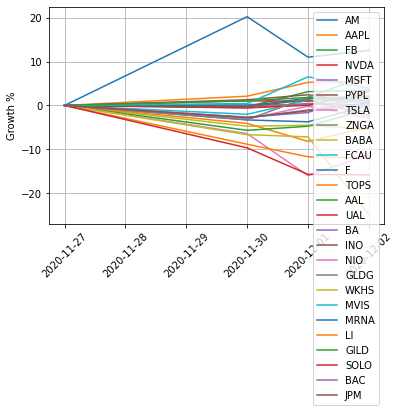

In [15]:
# Display Growth % over time
ax= plt.subplot()
for item in df_norm.columns:
    plt.plot(df_norm[item])

plt.xticks(rotation=45)
ax.legend(df.columns)
plt.ylabel('Growth %')
ax.grid(True)

## How do the price gains of the listings correlate to each other?

Correlation Matrix

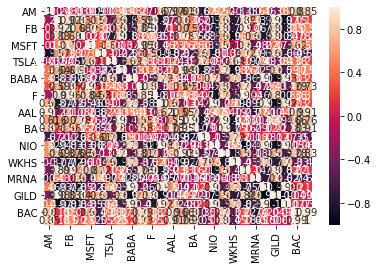

In [16]:
sns.heatmap(df_norm.corr(),annot=True);

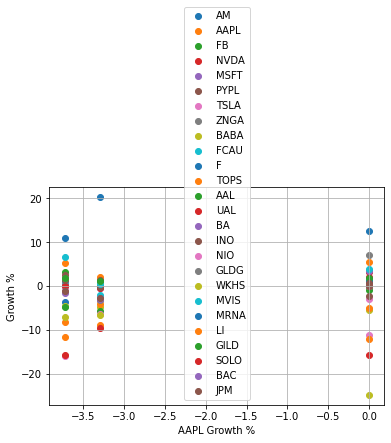

In [17]:
ax= plt.subplot()
for item in df_norm.columns:
    plt.scatter(df_norm.iloc[:,0],df_norm[item])

ax.legend(df_norm.columns)
plt.xlabel('AAPL Growth %')
plt.ylabel('Growth %')
ax.grid(True)

## Calculate percent and absolute estimate and bounds of Growth 

### Create a linear regression fit for the data with thrice the standard dev. of obs.-est. to determine the boundaries

<b> Linear Regression object, score and price boundaries for each listing </b>

In [18]:
def lin_obj(df):
    df_lin=df.iloc[0:1,:]
    df_lin.reindex(['fit_obj','score','bounds'])
    df_lin.drop(index=df_lin.index[0],inplace=True)
    for item in df_lin.columns:
        # Implement train-test split thrice and fit the data to the average fit ...
        # ... (intercept and coeff.) of the three splits
        X=np.array(pd.to_numeric(df.index)).reshape(-1, 1)
        Y=(df[item].values).reshape(-1, 1)
        lin_list_coeff=[]
        lin_list_intercept=[]
        for i in range(0,1):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0)
            lin_obj=LinearRegression()
            lin_obj.fit(X_train,y_train)
            lin_list_coeff.append(lin_obj.coef_)
            lin_list_intercept.append(lin_obj.intercept_)
        linobj = LinearRegression()
        linobj.coef_=np.array(np.array(lin_list_coeff).mean()).reshape(-1)
        linobj.intercept_=np.array(np.array(lin_list_intercept).mean()).reshape(-1)
        score=linobj.score(X,Y)
        df_lin.loc['fit_obj',item]=linobj
        df_lin.loc['score',item]=score

    # Calculate price bounds
    df_est=pd.DataFrame()
    df_est.rename_axis(index='Datetime')
    df_est['Datetime']=df.index
    df_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_lin.loc['fit_obj',item]
        for datetime in df_est.index:
            est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            df_est.loc[datetime,'{}'.format(item)]=est
    for item in df.columns:
        df_diff=df[item]-df_est[item]
        bounds=3*df_diff.std()
        df_lin.loc['bounds',item]=bounds
        
    return df_lin

Convert rise and fall from % to price (using price change= percent change/100*start price) and display.<br>

In [19]:
# Call lin_obj(...) to create the linear regression object dataframe
df_price_est_obj=lin_obj(df_norm)
for item in df_norm.columns:
    df_price_est_obj.loc['bounds',item]=df_price_est_obj.loc['bounds',item]*df_start.loc['start_price',item]/100
df_price_est_obj

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA,BABA,FCAU,F,TOPS,AAL,UAL,BA,INO,NIO,GLDG,WKHS,MVIS,MRNA,LI,GILD,SOLO,BAC,JPM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
fit_obj,"LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr..."
score,0.079844,0.902694,0.603541,0.858181,0.0487709,0.269503,0.29766,0.515717,0.918945,0.106589,0.512637,0.681211,0.120404,0.338973,0.0908545,0.121067,0.749505,0.325084,0.681297,0.515992,0.446967,0.964543,0.959869,0.963589,0.003636,0.000182512
bounds,0.408582,2.9044,10.5651,5.2333,2.57592,5.70828,24.802,0.0852305,5.88281,0.656696,0.167001,0.0696675,1.18861,1.86173,16.4152,0.523856,5.53426,0.226779,4.89159,0.14795,23.6448,1.24965,0.311407,0.35274,1.21846,5.48177


### Estimate the price and bounds vs. date using the fit object

In [20]:
# Function to estimate the price given the price dataframe, fit objects and datetime query
def price_est(df,df_price_est_obj,df_strt,datetime_query):
    df_price_est=pd.DataFrame()
    df_price_est.rename_axis(index='Datetime')
    df_price_est['Datetime']=pd.to_datetime(datetime_query)
    df_price_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_price_est_obj.loc['fit_obj',item]
        for datetime in df_price_est.index:
            norm_price_est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            price_est=norm_price_est*df_strt.loc['start_price',item]/100+df_strt.loc['start_price',item]
            df_price_est.loc[datetime,'{}'.format(item)]=price_est
            df_price_est.loc[datetime,'{}_low'.format(item)]=price_est-(df_price_est_obj.loc['bounds',item])
            df_price_est.loc[datetime,'{}_high'.format(item)]=price_est+(df_price_est_obj.loc['bounds',item])
            df_price_est.loc[datetime,'{}_lo_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_low'.format(item)]].mean()
            df_price_est.loc[datetime,'{}_hi_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_high'.format(item)]].mean()
    df_price_est.reindex(df_price_est.index.date)
    df_price_est=df_price_est
    return df_price_est


## What is the predicted share price?

In [21]:
df_price_est=price_est(df,df_price_est_obj,df_start,datetime_query)
df_price_est.head().style.background_gradient(axis=1).format("{:.0f}")

,AM,AM_low,AM_high,AM_lo_mid,AM_hi_mid,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,ZNGA,ZNGA_low,ZNGA_high,ZNGA_lo_mid,ZNGA_hi_mid,BABA,BABA_low,BABA_high,BABA_lo_mid,BABA_hi_mid,FCAU,FCAU_low,FCAU_high,FCAU_lo_mid,FCAU_hi_mid,F,F_low,F_high,F_lo_mid,F_hi_mid,TOPS,TOPS_low,TOPS_high,TOPS_lo_mid,TOPS_hi_mid,AAL,AAL_low,AAL_high,AAL_lo_mid,AAL_hi_mid,UAL,UAL_low,UAL_high,UAL_lo_mid,UAL_hi_mid,BA,BA_low,BA_high,BA_lo_mid,BA_hi_mid,INO,INO_low,INO_high,INO_lo_mid,INO_hi_mid,NIO,NIO_low,NIO_high,NIO_lo_mid,NIO_hi_mid,GLDG,GLDG_low,GLDG_high,GLDG_lo_mid,GLDG_hi_mid,WKHS,WKHS_low,WKHS_high,WKHS_lo_mid,WKHS_hi_mid,MVIS,MVIS_low,MVIS_high,MVIS_lo_mid,MVIS_hi_mid,MRNA,MRNA_low,MRNA_high,MRNA_lo_mid,MRNA_hi_mid,LI,LI_low,LI_high,LI_lo_mid,LI_hi_mid,GILD,GILD_low,GILD_high,GILD_lo_mid,GILD_hi_mid,SOLO,SOLO_low,SOLO_high,SOLO_lo_mid,SOLO_hi_mid,BAC,BAC_low,BAC_high,BAC_lo_mid,BAC_hi_mid,JPM,JPM_low,JPM_high,JPM_lo_mid,JPM_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-28 00:00:00,6,6,7,6,7,159,156,161,157,160,339,328,349,333,344,592,586,597,589,594,218,215,220,216,219,229,223,234,226,231,507,482,532,495,519,9,9,9,9,9,181,175,187,178,184,17,16,17,16,17,10,10,10,10,10,1,1,1,1,1,13,11,14,12,13,51,49,53,50,52,238,222,255,230,247,11,11,12,11,12,8,3,14,5,11,3,3,3,3,3,-6,-11,-1,-9,-4,3,3,3,3,3,233,209,256,221,245,8,7,9,7,9,67,67,68,67,67,-0,-1,-0,-1,-0,28,27,29,28,29,121,115,126,118,123


## What kind of volatility do the listings have?

## How do we generate our investment portfolio?

### Estimate the price history along with the bounds and plot the history and estimates for each listing

In [22]:
# Datetime history query values
datetime_query_start_end=pd.date_range(start=start,end=end)

In [23]:
# Generate and display estimates (listing, listing_low, listing_high)
df_price_est_start_end=price_est(df,df_price_est_obj,df_start,datetime_query_start_end)
df_price_est_start_end.head().style.format("{:.0f}")

,AM,AM_low,AM_high,AM_lo_mid,AM_hi_mid,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,ZNGA,ZNGA_low,ZNGA_high,ZNGA_lo_mid,ZNGA_hi_mid,BABA,BABA_low,BABA_high,BABA_lo_mid,BABA_hi_mid,FCAU,FCAU_low,FCAU_high,FCAU_lo_mid,FCAU_hi_mid,F,F_low,F_high,F_lo_mid,F_hi_mid,TOPS,TOPS_low,TOPS_high,TOPS_lo_mid,TOPS_hi_mid,AAL,AAL_low,AAL_high,AAL_lo_mid,AAL_hi_mid,UAL,UAL_low,UAL_high,UAL_lo_mid,UAL_hi_mid,BA,BA_low,BA_high,BA_lo_mid,BA_hi_mid,INO,INO_low,INO_high,INO_lo_mid,INO_hi_mid,NIO,NIO_low,NIO_high,NIO_lo_mid,NIO_hi_mid,GLDG,GLDG_low,GLDG_high,GLDG_lo_mid,GLDG_hi_mid,WKHS,WKHS_low,WKHS_high,WKHS_lo_mid,WKHS_hi_mid,MVIS,MVIS_low,MVIS_high,MVIS_lo_mid,MVIS_hi_mid,MRNA,MRNA_low,MRNA_high,MRNA_lo_mid,MRNA_hi_mid,LI,LI_low,LI_high,LI_lo_mid,LI_hi_mid,GILD,GILD_low,GILD_high,GILD_lo_mid,GILD_hi_mid,SOLO,SOLO_low,SOLO_high,SOLO_lo_mid,SOLO_hi_mid,BAC,BAC_low,BAC_high,BAC_lo_mid,BAC_hi_mid,JPM,JPM_low,JPM_high,JPM_lo_mid,JPM_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-26 00:00:00,7,7,7,7,7,115,112,118,113,116,274,264,285,269,279,528,523,533,525,531,215,212,217,214,216,212,206,217,209,214,587,562,612,574,599,8,8,8,8,8,279,273,284,276,281,16,15,16,15,16,9,9,9,9,9,1,1,1,1,1,15,14,16,14,15,45,43,47,44,46,213,196,229,205,221,12,12,13,12,13,55,50,61,53,58,2,2,2,2,2,29,24,34,27,31,2,2,2,2,2,128,104,151,116,140,40,39,42,40,41,60,59,60,60,60,9,8,9,8,9,29,27,30,28,29,120,115,126,117,123
2020-11-27 00:00:00,7,6,7,7,7,116,113,119,115,118,276,266,287,271,281,530,525,535,527,533,215,212,218,214,216,212,206,218,209,215,584,559,609,572,597,8,8,8,8,8,275,270,281,273,278,16,15,16,15,16,9,9,9,9,9,1,1,1,1,1,15,14,16,14,15,45,43,47,44,46,214,197,230,205,222,12,12,13,12,13,54,48,59,51,57,2,2,2,2,2,28,23,33,25,30,2,2,2,2,2,131,107,155,119,143,39,38,41,39,40,60,60,60,60,60,8,8,9,8,8,29,27,30,28,29,120,115,126,117,123
2020-11-28 00:00:00,7,6,7,7,7,118,115,121,116,119,278,268,289,273,283,532,527,537,529,535,215,212,218,214,216,213,207,218,210,215,582,557,607,569,594,8,8,8,8,8,272,267,278,269,275,16,15,16,15,16,9,9,9,9,9,1,1,1,1,1,15,14,16,14,15,45,43,47,44,46,214,198,231,206,223,12,12,13,12,13,52,47,58,50,55,2,2,2,2,2,27,22,32,24,29,2,2,2,2,2,134,111,158,123,146,38,37,40,38,39,60,60,61,60,60,8,8,8,8,8,29,27,30,28,29,120,115,126,117,123
2020-11-29 00:00:00,7,6,7,7,7,119,116,122,118,120,280,270,291,275,285,534,529,539,531,537,215,213,218,214,216,213,207,219,210,216,579,554,604,567,592,8,8,8,8,8,269,263,275,266,272,16,15,16,15,16,9,9,9,9,9,1,1,1,1,1,15,13,16,14,15,45,44,47,44,46,215,199,232,207,223,12,12,13,12,13,51,45,56,48,54,2,2,2,2,2,26,21,31,23,28,2,2,2,2,2,138,114,161,126,149,37,36,39,37,38,61,60,61,60,61,8,7,8,8,8,29,27,30,28,29,120,115,126,117,123
2020-11-30 00:00:00,7,6,7,7,7,120,117,123,119,122,282,272,293,277,287,536,531,541,533,539,215,213,218,214,217,214,208,219,211,217,577,552,602,564,589,8,8,8,8,8,266,260,272,263,269,16,15,16,15,16,9,9,9,9,9,1,1,1,1,1,15,13,16,14,15,46,44,47,45,47,216,200,232,208,224,12,12,13,12,12,49,44,55,47,52,2,2,2,2,2,25,20,29,22,27,2,2,3,2,2,141,117,165,129,153,36,35,38,36,37,61,60,61,61,61,7,7,8,7,8,29,27,30,28,29,120,115,126,117,123


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


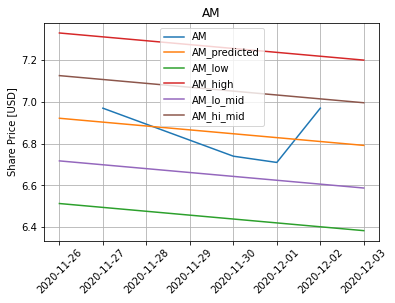

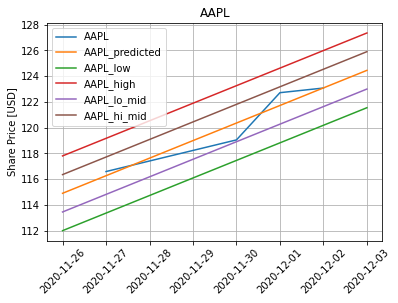

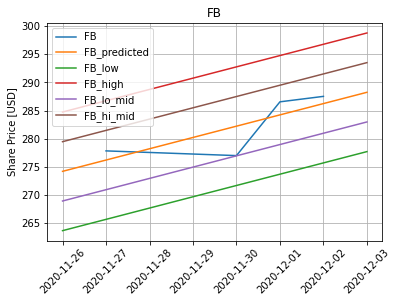

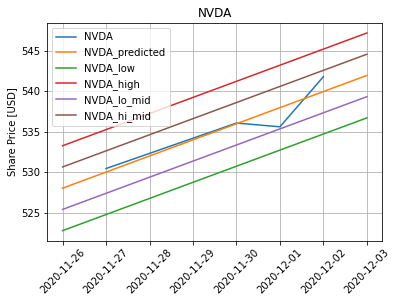

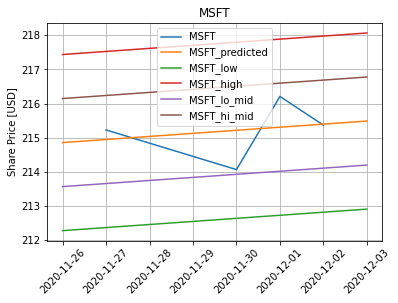

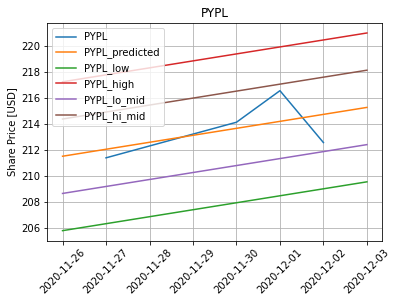

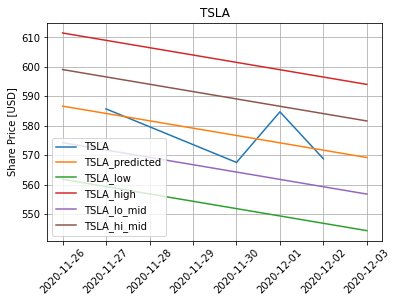

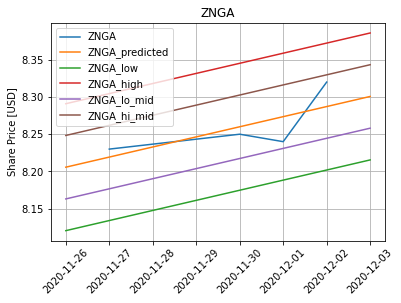

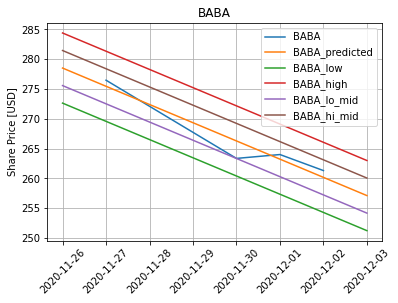

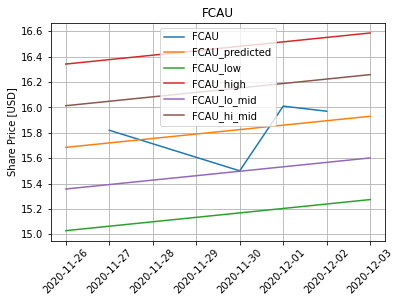

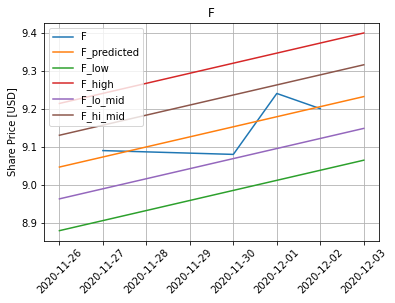

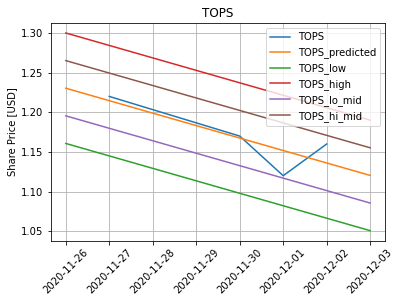

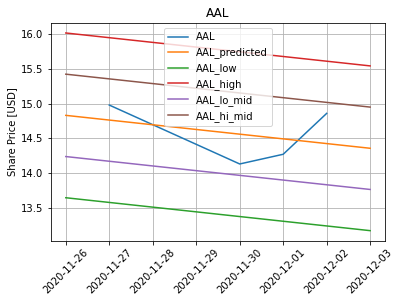

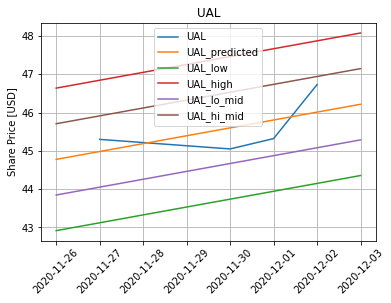

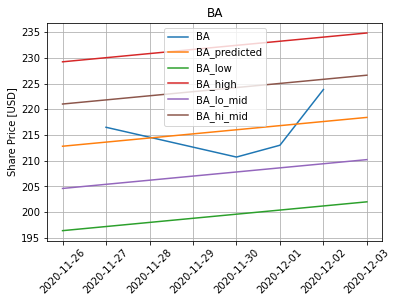

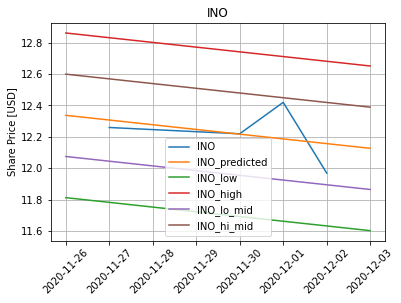

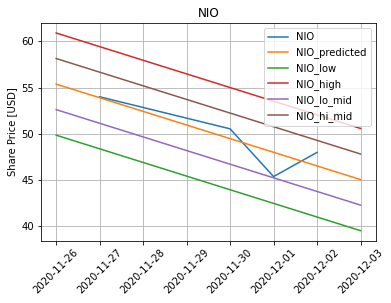

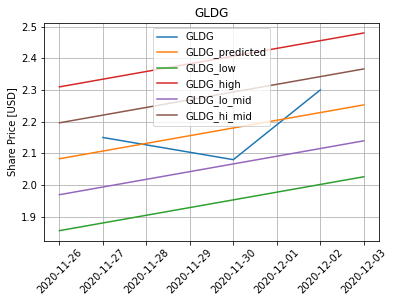

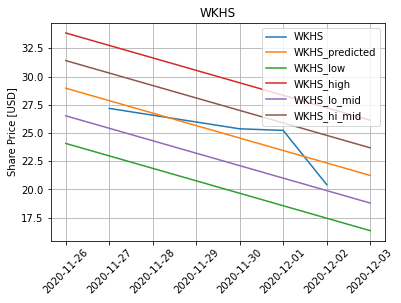

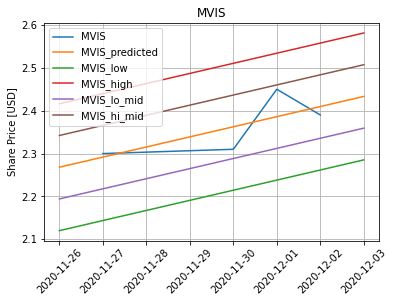

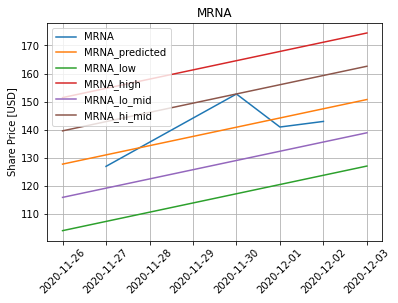

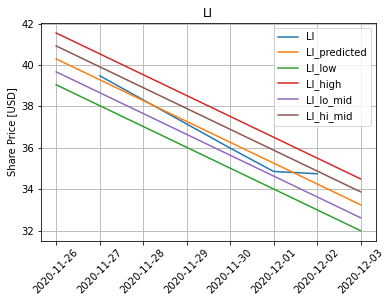

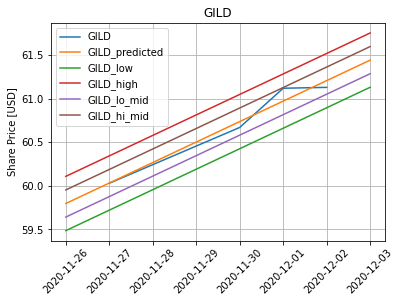

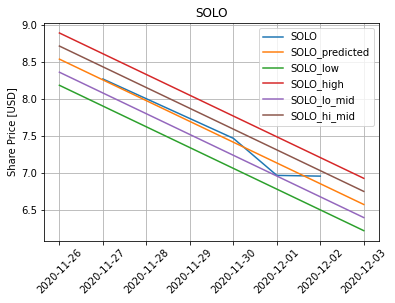

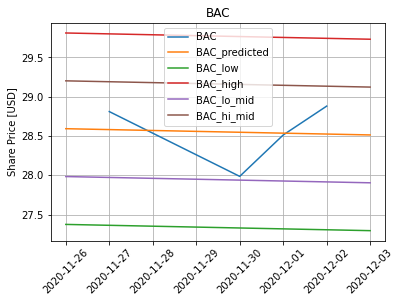

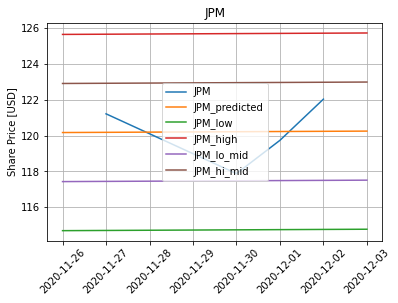

In [24]:
# Plot Open price vs. Time
num_plot=len(df.columns)
i=1
for item in df.columns:
    plt.figure()
    plt.plot(df_price[item])
    plt.plot(df_price_est_start_end[[item,item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid']])
    plt.legend([item,item+'_predicted',item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid'])
    plt.ylabel('Share Price [USD]')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.title(item)
    i=i+1

## Constructing the Portfolio

In order to balance the investments, we'd want to have the most benefit (reward) while minimizing volatility (risk).<br>
1. We can consider 'reward' to be the slope of the linear fit to share price (higher the slope, higher the gain).<br>
2. We can consider 'risk' to be the ratio between the price bounds and change in price over the duration of interest <br>
3. Hence we can compute a 'returns ratio' = 'reward'/'risk' for each listing; the higher this value, the more this investment is viable. <br>
4. Then we can compute the sum of the returns ratios for each listing and divide the returns ratio by the summed value, to determine the "weight" of each investment <br>
5. Finally we can multiply the "weight" by the total investment capital (total_investment) to obtain the recommended investment for each listing <br>    

### Use the Linear Regression object to construct the reward, volatility, returns ratio, weight and suggested investment values

In [25]:
# Initialize the portfolio dataframe df_portfolio and update the index suitably
df_portfolio=df_price_est_obj
df_portfolio=df_portfolio.reindex(['reward','risk','returns_ratio','weight','suggested_investment'])
df_portfolio=df_portfolio.rename_axis(index='Parameters')

# Update "reward" using the slope of the line fit (multiplied by a suitable factor for display)
for item in (df_portfolio.columns):
    df_portfolio.loc['reward',item]=(df_price_est_obj.loc['fit_obj',item].coef_[0])*10**17
    
# Update the "volatility" as the ratio of the price bounds to the absolute net price change over the duration
for item in (df_portfolio.columns):
    df_portfolio.loc['risk',item]=(df_price_est_obj.loc['bounds',
                                                              item])/abs(df_price_est_start_end.loc[df_price_est_start_end.index[-1],
                                                                                                 item]-
                                         df_price_est_start_end.loc[df_price_est_start_end.index[0],
                                                                    item])
                                         
# Update the returns ratio as the ratio between the "reward" and "volatility"
for item in (df_portfolio.columns):
    df_portfolio.loc['returns_ratio',item]=(df_portfolio.loc['reward',item]/
                                            df_portfolio.loc['risk',item])
    
# Remove those listings with negative returns_ratio since those imply a falling stock
for item in df_portfolio.columns:
    if df_portfolio.loc['reward',item]<=0:
        df_portfolio.pop(item)
        
# Obtain the weighted average of the returns ratio for each listing
for item in (df_portfolio.columns):
    df_portfolio.loc['weight',item]=df_portfolio.loc['returns_ratio',item]/df_portfolio.loc['returns_ratio',:].sum()

# Multiply the weight of each listing by the total investment capital to obtain the recommended investment
for item in (df_portfolio.columns):
    df_portfolio.loc['suggested_investment',item]=df_portfolio.loc['weight',item]*total_investment

# Display the portfolio dataframe
df_portfolio.style.background_gradient(axis=1).format("{:.2f}")

,AAPL,FB,NVDA,MSFT,PYPL,ZNGA,FCAU,F,UAL,BA,GLDG,MVIS,MRNA,GILD,JPM
Parameters,,,,,,,,,,,,,,,
reward,1355.06,838.00,433.43,48.40,292.92,190.86,256.06,336.51,525.60,428.06,1307.37,1186.16,2988.50,453.09,10.91
risk,0.30,0.75,0.38,4.09,1.52,0.90,2.68,0.90,1.29,2.93,1.33,0.90,1.03,0.19,68.52
returns_ratio,4457.93,1116.79,1151.62,11.84,192.18,212.74,95.53,372.78,406.54,146.16,980.04,1322.86,2901.95,2393.45,0.16
weight,0.28,0.07,0.07,0.00,0.01,0.01,0.01,0.02,0.03,0.01,0.06,0.08,0.18,0.15,0.00
suggested_investment,1980.01,496.02,511.50,5.26,85.36,94.49,42.43,165.57,180.56,64.92,435.29,587.55,1288.91,1063.06,0.07


In [26]:
df_portfolio.to_csv('portfolio.csv')

### What kind of volatility do the listings have?

 Refer the "volatility" row, higher the value, greater the volatility

### How do we use the data to construct our portfolio?

Refer the dataframe "df_portfolio"